### Load Data

In [68]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('load_per_country.csv', parse_dates=['DateTime'], index_col = ['DateTime'])
print(df.shape)

(87648, 40)


In [70]:
select = df[['PL','DE']]

select_2015 = select.loc['2015-01-01':'2015-12-31']

In [71]:
print(select)

                          PL       DE
DateTime                             
2006-01-01 00:00:00  14268.0  47823.0
2006-01-01 01:00:00  13602.0  47823.0
2006-01-01 02:00:00  13027.0  43444.0
2006-01-01 03:00:00  12606.0  41432.0
2006-01-01 04:00:00  12393.0  40508.0
...                      ...      ...
2015-12-31 19:00:00  17511.0  52481.0
2015-12-31 20:00:00  16373.0  49056.0
2015-12-31 21:00:00  15511.0  47253.0
2015-12-31 22:00:00  15112.0  47057.0
2015-12-31 23:00:00  14568.0  45305.0

[87648 rows x 2 columns]


### SVM Analysis - PL

In [72]:
from sklearn.model_selection import train_test_split

nonan = select_2015.dropna()
nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, 1:].values, nonan['PL'].values,test_size=0.2)

In [73]:
from sklearn.svm import SVR
svr = SVR(kernel="poly").fit(x_train, y_train)
#svr = SVR().fit(x_train, y_train)

print(svr)

SVR(kernel='poly')


In [74]:
y_train_predict=svr.predict(x_test)

In [75]:
print(y_train_predict.size)

73


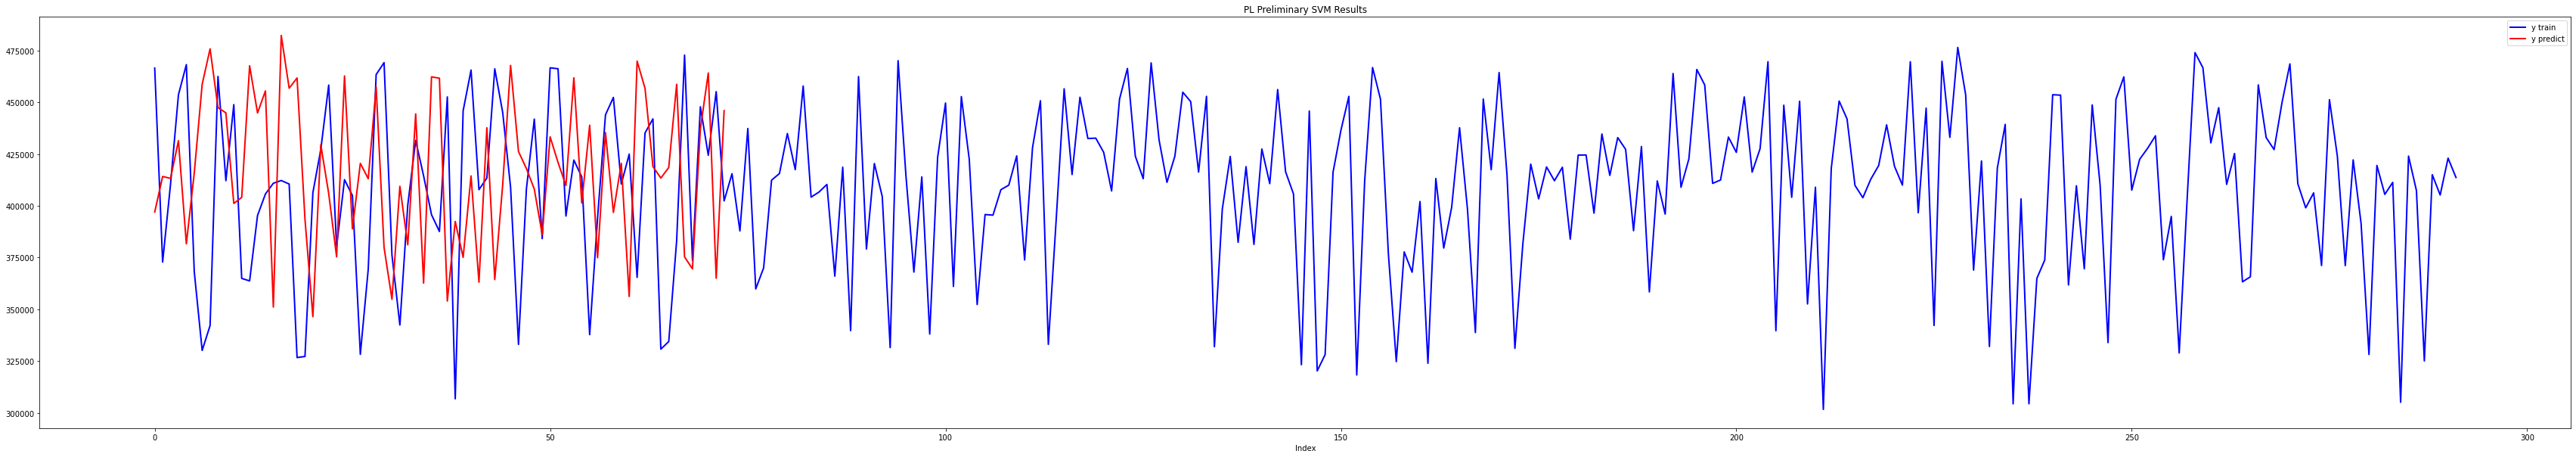

In [76]:
#plt.plot( y_train_predict, lw=1, color="red", label="fitted")
plt.plot( y_train, lw=2, color="blue", label="y train")
plt.plot( y_train_predict, lw=2, color="red", label="y predict")
plt.legend()
plt.title("PL Preliminary SVM Results")
plt.xlabel("Index")
plt.rcParams["figure.figsize"] = (60,10)
plt.show()

### SVM Analysis - DE

In [77]:
from sklearn.model_selection import train_test_split

nonan = select_2015.dropna()
nonan = nonan.groupby(pd.Grouper(level='DateTime', axis=0, freq='24H')).sum()

x_train, x_test, y_train, y_test = train_test_split(nonan.iloc[:, 1:].values, nonan['DE'].values,test_size=0.2)

In [78]:
from sklearn.svm import SVR
svr = SVR(kernel="poly").fit(x_train, y_train)
#svr = SVR().fit(x_train, y_train)

print(svr)

SVR(kernel='poly')


In [79]:
y_train_predict=svr.predict(x_test)

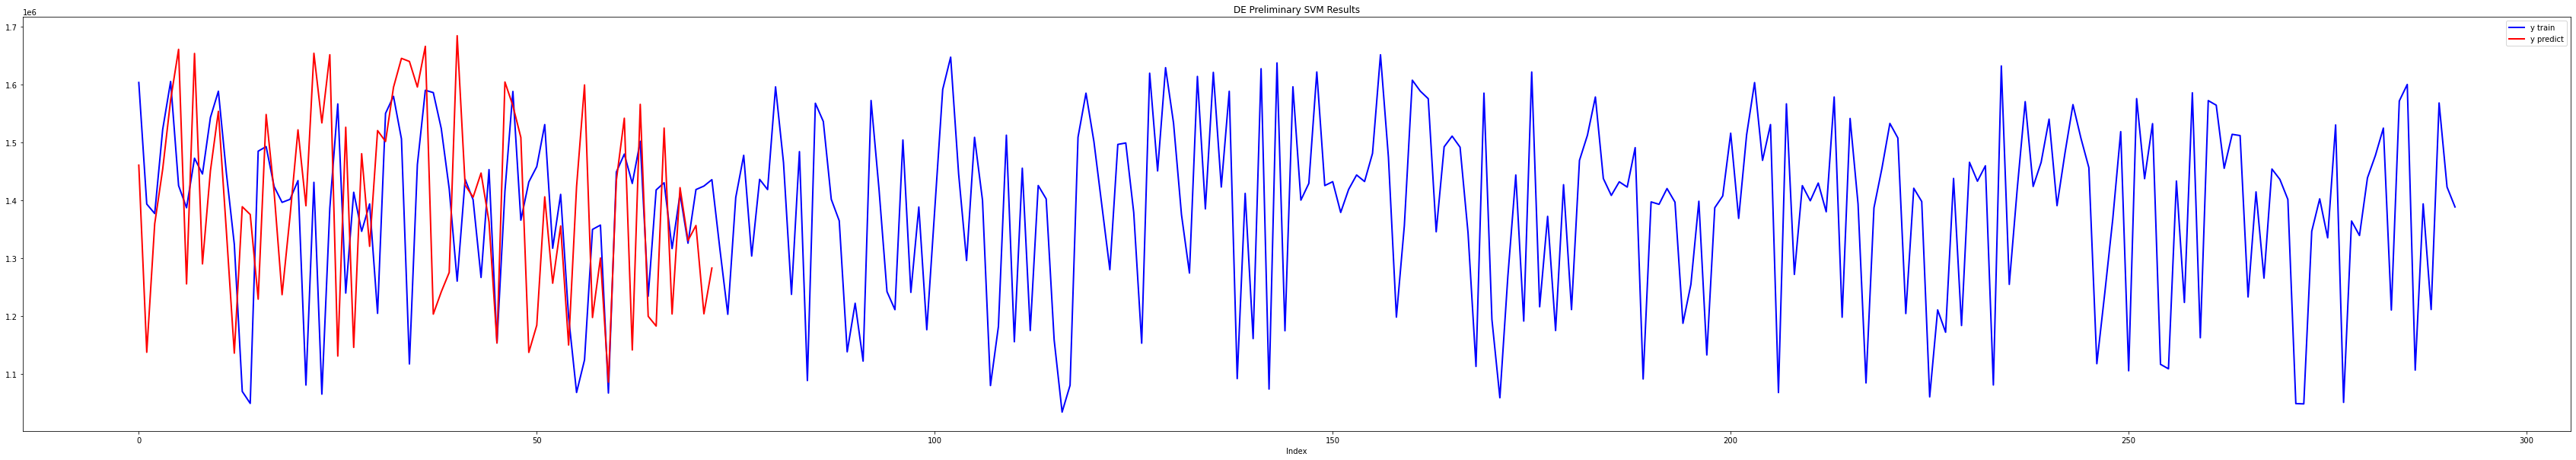

In [80]:
#plt.plot( y_train_predict, lw=1, color="red", label="fitted")
plt.plot( y_train, lw=2, color="blue", label="y train")
plt.plot( y_train_predict, lw=2, color="red", label="y predict")
plt.legend()
plt.title("DE Preliminary SVM Results")
plt.xlabel("Index")
plt.rcParams["figure.figsize"] = (60,10)
plt.show()

### Method 2

In [ ]:
'''

nonan = select.dropna()

x = select.iloc[:, 1:].values 
y = select['PL'].values

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)
'''

In [ ]:
###################

In [ ]:
'''
nonan = select.dropna()
x = nonan.iloc[:, 1:].values
y = nonan['PL'].values

svr = SVR().fit(x, y)
print(svr)
'''

In [ ]:
#yfit = svr.predict(x)

In [ ]:
'''
plt.plot(x, yfit, lw=2, color="red", label="fitted")
select.plot()
plt.legend()
plt.show()
'''

### Scratch Code

In [ ]:
'''
print(select.index.shape)
print(select[y1].shape)

print(select['PL'].values)

x = select.iloc[:, 1:].values # select.index
y = select['PL'].values

print(x.size)
'''

'''
nonan = select.dropna()
x = nonan.iloc[:, 1:].values
y = nonan['PL'].values

svr = SVR().fit(x, y)
print(svr)
'''


#yfit = svr.predict(x)


'''
#plt.scatter(x, y, s=5, color="blue", label="original")

plt.plot(x, yfit, lw=2, color="red", label="fitted")
select.plot()
plt.legend()
plt.show()
'''

# citations
# https://scialert.net/fulltext/?doi=jas.2010.950.958#:~:text=The%20ability%20of%20SVM%20to%20solve%20nonlinear%20regression,its%20successful%20application%20in%20classification%20and%20regression%20tasks.

In [ ]:
'''
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))
 
#Plotting the feature importance for Top 10 most important columns
#The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
feature_importances = pd.Series(SVM.coef_&#91;0], index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults&#91;TargetVariable]=y_test
TestingDataResults&#91;('Predicted'+TargetVariable)]=prediction
TestingDataResults.head()
'''